<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [2]:
%matplotlib inline
%precision 3
import numpy
import matplotlib.pyplot as plt

### Conceitos fundamentais

Começamos por rever alguns resultados relativos à projecção de
vectores em subespaços de $\mathbb{R}^n$.

#### Produto interno

Supondo que $x$ e $y$ são dois vectores
de $\mathbb{R}^n$. Definimos o produto interno usual como sendo:
$$
\begin{array}{rcl}
  x\cdot y & = & x^Ty \\
   & = &\left[
          \begin{array}{cccc}
            x_1 & x_2 & \ldots & x_n \\
          \end{array}
        \right]\left[
                 \begin{array}{c}
                   y_1 \\
                   y_2 \\
                   \vdots \\
                   y_n \\
                 \end{array}
               \right] \\
   & = & x_1y_1+x_2y_2+\cdots+x_ny_n
\end{array}
$$
Podemos notar que o produto interno é um escalar, neste sentido é
vulgar ser designado por produto escalar. Por exemplo se
$x=(1,2,3)^T$ e $y=(4,5,6)^T$, então
$$
\begin{array}{rcl}
  x\cdot y & = & 1.4+2.5+3.6 \\
   & = & 4+10+18 \\
   & = & 32.
\end{array}
$$

Para facilitar a manipulação algébrica podemos provar que esta
operação satisfaz:

Se $x$,$y$ e $z$ são vectores em $\mathbb{R}^n$ e $\alpha$ é um
escalar real $\mathbb{R}$, então
- $x\cdot x\geq0$
- $x\cdot x = 0$ se e só se $x = 0$
- $(\alpha x)\cdot y = x\cdot(\alpha y) = \alpha (x\cdot y)$
- $x\cdot(y+z)=x\cdot y+x\cdot z$

#### Norma dum vector
Seja $x=(x_1,x_2)^T$ um vector do
plano. Recorde que o comprimento do vector é dado por
$$
\|x\|=\sqrt{x_1^2+x_2^2}.
$$
Esta definição pode ser extendida a vectores
$x=(x_1,x_2,\ldots,x_n)^T\in\mathbb{R}^n$ fazendo
$$
\|x\|=\sqrt{x_1^2+x_2^2+\cdots+x_n^2}.
$$
É usual chamar ao comprimento dum vector \emph{norma} ou
\emph{magnitude}.

Caso $x=(x_1,x_2,\ldots,x_n)^T$, temos
$\|x\|^2=x_1^2+x_2^2+\cdots+x_n^2$ e $x\cdot
x=x_1^2+x_2^2+\cdots+x_n^2$ donde podemos concluir que

#### Proposição:
Se $x=(x_1,x_2,\ldots,x_n)\in \mathbb{R}^n$ então
$$
\|x\|^2=x\cdot x.
$$

De forma simples podemos verificar as seguintes propriedades da
norma:

#### Propriedades:
Se $x$ e $y$ são vectores de $\mathbb{R}^n$ e $\alpha$ é qualquer
escalar real, então
- $\|x\|\geq0$
- $\|x\|=0$ se e só se $x=0$
- $\|\alpha x\|=|\alpha|\|x\|$
- $\|x+y\|\leq\|x\|+\|y\|$

### Ortogonalidade:

Com vista ao que pretendemos fazer  é importante sabermos quando é
que dois vectores são perpendiculares. Na figura abaixo
representamos três vectores $x$, $y$ e a sua diferença $x-y$.

![x-y](./images/triang.jpg)

A lei dos cosenos oferece-nos um meio para relacionar o comprimento
dos lagos do triângulo e o amplitude do ângulo definido pelos
vectores $x$ e $y$.
$$
\|x-y\|^2=\|x\|^2+\|y\|^2-2\|x\|\|y\|\cos\theta
$$
Podemos usar as proposições ateriores para
o membro da esquerda
$$
\begin{array}{ccc}
  \|x-y\|^2 & = & (x-y)\cdot(x-y) \\
   & = & x\cdot x-2x\cdot y+y\cdot y \\
   & = & \|x\|^2-2x\cdot y+\|y\|^2
\end{array}
$$
Assim
$$
\|x\|^2-2x\cdot y+\|y\|^2=\|x\|^2+\|y\|^2-2\|x\|\|y\|\cos\theta
$$
cancelando grandezas  iguais  em ambos os membros obtemos:

#### Proposição:

Se $x$ e $y$ são vectores de $\mathbb{R}^2$, então
$$
x\cdot y=\|x\|\|y\|\cos\theta.
$$


Se dois vectores não nulos $x$ e $y$ são perpendiculares, o ângulo
entre eles é de $\pi/2$ e
$$
x\cdot y=\|x\|\|y\|\cos(\pi/2)=0
$$
Reciprocamente, se o produto interno de vectores não nulos é zero
temos
$$
\|x\|\|y\|\cos\theta=x\cdot y=0
$$
Como os vectores são não nulos temos de ter $\cos\theta=0$, ou seja
$\theta=\arccos 0=\pi/2$. Podemos assim concluir que os vectores são
perpendiculares. Este resultado também é válido em $\mathbb{R}^3$.

#### Proposição:
Em $\mathbb{R}^2$ e $\mathbb{R}^3$ dois vectores são perpendiculares
se e só se o seu produto interno é zero.


É difícil de imaginar o que se pode entende por vectores
perpendiculares em espaços de dimensão grande. Partindo do
pressuposto que a noção estende o que se passa para espaços de
dimensão pequena definimos:

#### Definição:
Dois vectores $x$ e $y$ de $\mathbb{R}^n$ são perpendiculares ou
ortogonais se e só se o seu produto interno é zero.

### Projeções de vectores

Nesta secção vamos projectar ortogonalmente um vector $b$ noutro
vector $a$. Na figural abaixo o resultado da projecção deve ser
entendido como sendo o vector $p$. Note que esta selecção de $p$ faz
com que a norma do vector erro $e=b-p$ seja mínimo.

![e=b-p](./images/prepvect.jpg)

A projecção $p$ é paralelo a $a$. Assim $p$ é uma combinação linear
de $a$, $p=\alpha a$ onde $\alpha$ é um escalar real. O vector erro
$e$ é ortogonal a $a$. Assim, o produto interno de $a$ e $e$ é zero,
donde:
$$
\begin{array}{rcl}
  a\cdot e & = & 0 \\
  a\cdot (b-p) & = & 0 \\
  a\cdot (b-\alpha a) & = & 0 \\
  a\cdot b -\alpha (a\cdot a) & = & 0 \\
  \alpha & = & \frac{a\cdot b}{a \cdot a}
\end{array}
$$

Podemos assim concluir que:

#### Proposição:
Se $b$ e $a$ são vectores em $\mathbb{R}^n$, então a projecção de
$b$ sob o vector $a$ é dado por
$$
p=\frac{a\cdot b}{a\cdot a}a.
$$

Usando a definição de produto internos podemos escrever
$$
p=a\frac{a^Tb}{a^Ta}\Leftrightarrow p=\frac{aa^T}{a^Ta}b
$$
Note que $P=\frac{aa^T}{a^Ta}=\frac{1}{a^Ta}aa^T$ é uma matriz
quadrada de ordem $n$ designada de matriz projecção:

#### Proposição:
Se $a$ é um vector de $\mathbb{R}^n$, então a matriz
$$P=\frac{1}{a^Ta}aa^T$$
projecta ortogonalmente qualquer vector $b$ de $\mathbb{R}^n$ no
subespaço gerado por $a$.

### Projeção sob um subespaço

Centremos agora a nossa atenção na projecção ortogonal de vectores
num subespaço gerado por $a_1,a_2,\ldots,a_k$. Assumindo que os
vectores $a_1,a_2,\ldots,a_k$ são linearmente independentes. Assim,
os vectores $a_1,a_2,\ldots,a_k$ definem o espaço das colunas da
matriz regular $A=[a_1,a_2,\ldots,a_k]$. Se $b$ pertencer ao espaço
das colunas de $A$ o resultado da projecção de ser o próprio $b$.
Assumindo que $b$ não é combinação linear das colunas de $A$. Se o
resultado da projecção é um vector $p$ a norma do vector erro
$e=b-p$ é mínimo se a projecção for ortogonal, i.e. se $e$ é um
vector perpendicular ao espaço $C(A)$ gerado pelas colunas de $A$.

![3D](./images/prepvect3d.jpg)

O vector erro $e$ é ortogonal a $C(A)$ se for ortogonal a todos os
vectores de $C(A)$. Para que assim seja basta que o vector seja
particular às colunas de $A$ uma vez que como todo o vector $x\in
C(A)$ se escreve como combinação linear das colunas de $A$ temos
$$
\begin{array}{rcl}
  e\cdot x & = & e\cdot(c_1a_1+c_2a_2+\cdots+c_ka_k) \\
   & = & c_1e\cdot a_1+c_2e\cdot a_2+\cdots+c_ke\cdot a_k) \\
   & = & 0+0+\cdots+0 \\
   & = & 0,
\end{array}
$$
donde resulta que $e$ é ortogonal a $x$. Assim determinemos $e$ tal
que:
$$
a_1\cdot e=0, a_2\cdot e=0,\ldots,a_n\cdot e=0
$$
en notação matricial
$$
a_1^Te=0, a_2^Te=0,\ldots,a_n^T e=0
$$
Uma vez que $a_1,a_2,\ldots,a_k$ são colunas de $A$,
$a_1^T,a_2^T,\ldots,a_k^T$ são as linhas de $A^T$. Podemos expressar
a relação através uma multiplicação de matrizes,
$$
\left[
  \begin{array}{c}
    a_1^T \\
    a_2^T \\
    \vdots \\
    a_n^T \\
  \end{array}
\right]e= \left[
  \begin{array}{c}
    0 \\
    0 \\
    \vdots \\
    0 \\
  \end{array}
\right]
$$

O que é equivalente a escrever
$$
A^Te=0.
$$
Como o vector projecção $p$ pertence ao espaço das colunas de $A$,
$p$ pode ser escrito como combinação linear das colunas de $A$.
$$
\begin{array}{rcl}
  p & = & x_1a_1+x_2a_2+\ldots+x_ka_k, \\
   & = & \left[
           \begin{array}{cccc}
             a_1 & a_2 &\ldots& a_k \\
           \end{array}
         \right]
           \left[
             \begin{array}{c}
               x_1 \\
               x_2 \\
               \vdots \\
               x_k \\
             \end{array}
           \right]
    \\
   & = & Ax.
\end{array}
$$
Assim, como $A^Te=0$ e $e=b-Ax$ temos
$$
\begin{array}{rcl}
  A^T(b-Ax) & = & 0 \\
  A^Tb-A^TAx) & = & 0 \\
  A^TAx & = & A^Tb.
\end{array}
$$

Como as colunas de A são linearmente independentes $A^TA$ é regular.
Donde existe $(A^TA)^{-1}$ que multiplicamos à esquerda na última
equação, obtendo:
$$
x=(A^TA)^{-1}A^Tb,
$$
donde podemos extrair uma forma para calcular o vector projecção $p$
$$
\begin{array}{rcl}
  p & = & Ax \\
   & = & A(A^TA)^{-1}A^Tb
\end{array}
$$

Escrevendo $P=A(A^TA)^{-1}A^T$ temos $p=Pb$. A matrix $P$ é
designada matriz projecção.

#### Proposição:
Se $a_1,a_2,\ldots,a_k$ é uma sequência de vectores linearmente
independentes de $\mathbb{R}$, então
\[
P=A(A^TA)^{-1}A^T
\]
define a projecção de qualquer vector de $\mathbb{R}^n$ no espaço
gerado pelas colunas de $[A=a_1,a_2,\ldots,a_k]$.


## Mínimos quadrados

 É normal que se necessite de construir
curvas que se ajustem a informação que é recolhida. Isto é muitas
vezes motivado pelo facto dos dados disponíveis representarem
aproximações discretas da realidade. Sendo suficiente para muitas
aplicações a expressão de curvas que aproximam desses dados. Tomemos
o seguinte exemplo:

Encontremos a linha que "melhor se ajuste" no sentido dos mínimos
quadrados aos dados da tabela abaixo:

|   |   |   |  |
|--- |--- |--- |---|
| x  | 0  | 1  | 2 |
| y  | 6  | 0  | 0 |
  
  
  
Se imprimirmos os pontos da tabela é evidente que eles não são
coiceares. Tentemos na mesma determinar uma recta $y=mx+b$ que passe
por esses pontos. Para que tal se verifique teriam de ser
verificadas simultaneamente:
$$
\begin{array}{ccc}
  6 & = & m(0)+b \\
  0 & = & m(1)+b \\
  0 & = & m(2)+b
\end{array}
$$
Tal sistema é naturalmente impossível. A matriz do ampliada do
sistema tem característica 3 enquanto a característica da matriz
simples é 2.

O sistema tem a forma matricial
$$
\left[
  \begin{array}{cc}
    0 & 1 \\
    1 & 1 \\
    2 & 1 \\
  \end{array}
\right] \left[
  \begin{array}{c}
    m \\
    b \\
  \end{array}
\right]= \left[
  \begin{array}{c}
    6 \\
    0 \\
    0 \\
  \end{array}
\right]
$$
Tendo a forma $Ax=b$ com
$$
A=\left[
  \begin{array}{cc}
    0 & 1 \\
    1 & 1 \\
    2 & 1 \\
  \end{array}
\right],\, x=\left[
  \begin{array}{c}
    m \\
    b \\
  \end{array}
\right],\text{ and } b=\left[
  \begin{array}{c}
    6 \\
    0 \\
    0 \\
  \end{array}
\right]
$$
O facto do sistema ser impossível garante que $b$ é linearmente
independente relativamente às colunas de $A$. Contudo a projecção
$p$ de $b$ no subespaço definido pelas colunas de $A$ está em
$C(A)$. Assim podemos encontrar solução para $Ay=p$ e esta solução
minimiza o vector erro $e=b-p$.

Uma vez que $Ax=b$ não tem solução procuremos uma solução para
$Ay=p$. Como o vector erro $e=b-p$ é ortogonal a cada linha de
$A^T$, temos
$$
\begin{array}{ccc}
  A^T(b-p) & = & 0 \\
  A^T(b-Ay) & = & 0 \\
  A^Tb-A^TAy & = & 0 \\
  A^TAy & = & A^Tb.
\end{array}
$$

O sistema de equações $A^TAy = A^Tb$ é chamado equações normais.
Devemos notar que é fácil generalizar as equações normais. Para isso
basta tomar um sistema impossível $Ax=b$, multiplicar ambos os
membros à esquerda por $A^T$, substituindo $x$ por $y$.

Uma vez que a solução de $Ax=b$ não existe, podemos tomar $y$ como
sendo uma solução aproximação de $Ax=b$, se olharmos para $Ay$ como
um vector projecção $p$. Assim
$$x\approx y$$
$$
\left[
  \begin{array}{c}
    m \\
    b \\
  \end{array}
\right] \approx \left[
  \begin{array}{c}
    -3 \\
    5 \\
  \end{array}
\right].
$$
Isto dá resposta ao nosso problema: A recta $y=-3x+5$ ajusta-se ao
dados inicias.

![y=-3x+5](./images/3poinreg.jpg)

Vamos encarar como erro do ajustamento da linha para aproximar os
pontos  como sendo o quadrado da norma do o vector erro
$\|e\|^2=\|b-p\|^2$.

###  Exemplo: Mínimos quadrados

Vamos agora usar o mesmo método para determinar a curva que melhor
se ajusta aos dados da tabela abaixo. Onde $m$ representa a massa de
objectos suspensos numa mola e $d$ o comprimento que essa mola
alcança a partir da sua posição de equilíbrio:

|    |    |    |    |    |    |    |
|--- |--- |--- |--- |--- |--- |--- |
|  m | 10 | 20 | 30 | 50 | 40 | 60 |
|  d | 1.4 | 2.8 | 3.6 | 5.0 | 6.4 | 7.2 |



Como os pontos parecem seguir uma recta vamos procural a curva de
equação $d=a+bm$ que melhor se ajuste aos dados. Para isso começamos
substituir os dados na equação.
$$1.4=a+10b$$
$$2.8=a+20b$$
$$3.6=a+30b$$
$$5.0=a+40b$$
$$6.4=a+50b$$
$$7.2=a+60b$$
O que pode ser apresentado na forma matricial
$$
\left[
  \begin{array}{cc}
    1 & 10 \\
    1 & 20 \\
    1 & 30 \\
    1 & 40 \\
    1 & 50 \\
    1 & 60 \\
  \end{array}
\right] \left[
  \begin{array}{c}
    a \\
    b \\
  \end{array}
\right] = \left[
  \begin{array}{c}
    1.4 \\
    2.8 \\
    3.6 \\
    5.0 \\
    6.4 \\
    7.2 \\
  \end{array}
\right]
$$
Que pode ser representado por $Ax=d$ onde
$$
A=\left[
  \begin{array}{cc}
    1 & 10 \\
    1 & 20 \\
    1 & 30 \\
    1 & 40 \\
    1 & 50 \\
    1 & 60 \\
  \end{array}
\right], x=\left[
  \begin{array}{c}
    a \\
    b \\
  \end{array}
\right],\text{ and } b= \left[
  \begin{array}{c}
    1.4 \\
    2.8 \\
    3.6 \\
    5.0 \\
    6.4 \\
    7.2 \\
  \end{array}
\right]
$$

[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 50.]
 [ 1. 40.]
 [ 1. 60.]]
y = 0.5599999999999953 + 0.10971428571428582 * x


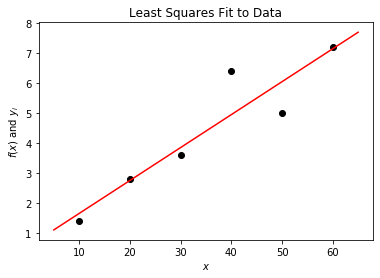

In [9]:
# Linear Least Squares Problem

# First define the independent and dependent variables.
N = 20
points = numpy.linspace(5, 65, N)
x = numpy.array([10, 20, 30, 50, 40, 60 ])
y = numpy.array([1.4, 2.8, 3.6, 5.0, 6.4, 7.2  ]) 

# Define the Vandermonde matrix based on our x-values
A = numpy.ones((x.shape[0], 2))
A[:, 1] = x.transpose()

print(A)

# Determine the coefficients of the polynomial that will
# result in the smallest sum of the squares of the residual.
p = numpy.linalg.solve(numpy.dot(A.transpose(), A), numpy.dot(A.transpose(), y.transpose()))

print("y = %s + %s * x" % (p[0], p[1]))

# Plot it out, cuz pictures are fun!
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, y, 'ko')
axes.plot(points, p[0] + p[1] * points, 'r')
axes.set_title("Least Squares Fit to Data")
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$ and $y_i$")

plt.show()